# Model Comparison

This section of multiple regression is going to explore model comparison, to guide the selection of the best fitting model from a set of competing models. 

In [29]:
library(tidyverse)
library(ggformula)

theme_set(theme_bw(base_size = 18))

college <- read_csv("https://raw.githubusercontent.com/lebebr01/statthink/main/data-raw/College-scorecard-4143.csv") %>%
  mutate(act_mean = actcmmid - mean(actcmmid, na.rm = TRUE),
         cost_mean = costt4_a - mean(costt4_a, na.rm = TRUE)) %>%
  drop_na(act_mean, cost_mean)

head(college)
dim(college)

Rows: 7058 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): instnm, city, stabbr, preddeg, region, locale
dbl (10): adm_rate, actcmmid, ugds, costt4_a, costt4_p, tuitionfee_in, tuiti...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



instnm,city,stabbr,preddeg,region,locale,adm_rate,actcmmid,ugds,costt4_a,costt4_p,tuitionfee_in,tuitionfee_out,debt_mdn,grad_debt_mdn,female,act_mean,cost_mean
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama A & M University,Normal,AL,Bachelor Degree,Southeast,City: Midsize,0.9027,18,4824,22886,NA,9857,18236,13246.0,32750,0.5640301,-5.425912,-3482.955
University of Alabama at Birmingham,Birmingham,AL,Bachelor Degree,Southeast,City: Midsize,0.9181,25,12866,24129,NA,8328,19032,14979.5,21833,0.6390907,1.574088,-2239.955
University of Alabama in Huntsville,Huntsville,AL,Bachelor Degree,Southeast,City: Midsize,0.8123,28,6917,22108,NA,10280,21480,13522.0,22647,0.4763499,4.574088,-4260.955
Alabama State University,Montgomery,AL,Bachelor Degree,Southeast,City: Midsize,0.9787,18,4189,19413,NA,11068,19396,15738.0,31500,0.6134185,-5.425912,-6955.955
The University of Alabama,Tuscaloosa,AL,Bachelor Degree,Southeast,City: Midsize,0.5330,28,32387,28836,NA,10780,28100,17340.0,23290,0.6152524,4.574088,2467.045
Auburn University at Montgomery,Montgomery,AL,Bachelor Degree,Southeast,City: Midsize,0.8254,22,4211,19892,NA,8020,17140,10750.0,23363,0.6929481,-1.425912,-6476.955


[1] 1281   18

In [30]:
adm_mult_reg <- lm(adm_rate ~ act_mean + cost_mean, data = college)

summary(adm_mult_reg)


Call:
lm(formula = adm_rate ~ act_mean + cost_mean, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65484 -0.12230  0.02291  0.13863  0.37054 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.834e-01  6.346e-03 107.681  < 2e-16 ***
act_mean    -1.669e-02  1.650e-03 -10.114  < 2e-16 ***
cost_mean   -2.304e-06  4.047e-07  -5.693 1.55e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1813 on 1278 degrees of freedom
Multiple R-squared:  0.1836,	Adjusted R-squared:  0.1824 
F-statistic: 143.8 on 2 and 1278 DF,  p-value: < 2.2e-16


## Omnibus Hypothesis

In linear regression, I omitted a portion of the output from above that typically comes with most statistical output. That is, there is a test statistic that aims to test if the model is explaining variation over and above a simple mean. More specifically, this omnibus hypothesis tests the following:

$$ 
H_{0}: All\ \beta = 0 \\[10pt]
H_{A}: Any\ \beta \neq 0
$$

This hypothesis can be formally tested with an F-statistic which is distributed as an F distribution with $p$ predictor attributes and $n - p - 1$ degrees of freedom. 

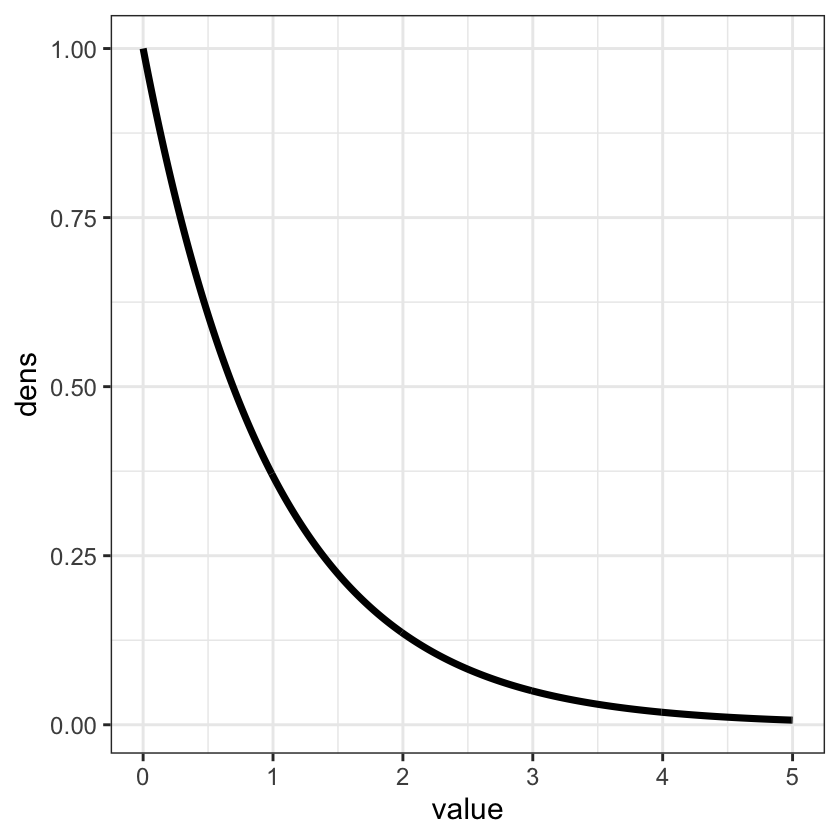

In [20]:
f_data <- data.frame(value = seq(0, 5, by = .01)) %>%
   mutate(dens = df(value, 2, 1278))

gf_line(dens ~ value, data = f_data, size = 2)

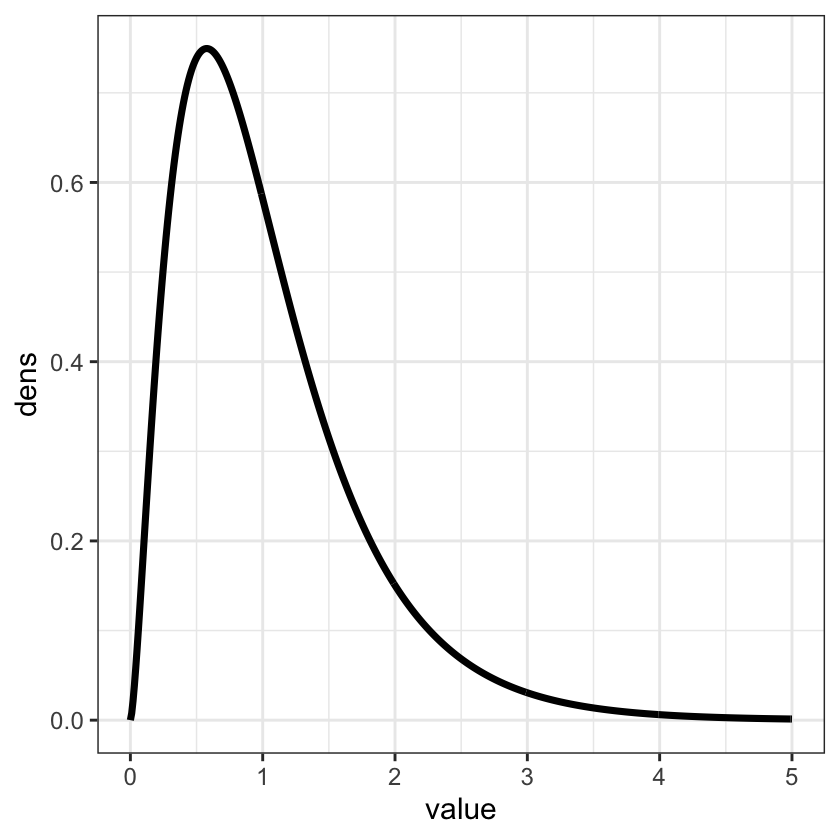

In [21]:
f_data <- data.frame(value = seq(0, 5, by = .01)) %>%
   mutate(dens = df(value, 5, 50))

gf_line(dens ~ value, data = f_data, size = 2)

## Adjusted R-squared
The adjusted R-squared is typically used when comparing models. This statistic is commonly used as R-square represents the ratio between explained and total variance, therefore, this will always increase, even if the new attribute entered is not helpful. The adjusted R-squared tries to adjust for model complexity. There are many ways to do this, but the most common will be defined here.

$$
\bar{R}^2 = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}
$$

or 

$$ 
\bar{R}^2 = 1 - \frac{SS_{res} / df_{e}}{SS_{tot} / df_{t}}
$$
where $p$ is the number of predictors (excluding the intercept), $n$ is the sample size, $SS_{e}$ and $$SS_{tot}$ are sum of square residual and total respectively, and $df_{e}$ and $df_{t}$ are degrees of freedom for the error ($n - p - 1$) and total ($n - 1$) respectively. 

In [31]:
summary(adm_mult_reg)


Call:
lm(formula = adm_rate ~ act_mean + cost_mean, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65484 -0.12230  0.02291  0.13863  0.37054 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.834e-01  6.346e-03 107.681  < 2e-16 ***
act_mean    -1.669e-02  1.650e-03 -10.114  < 2e-16 ***
cost_mean   -2.304e-06  4.047e-07  -5.693 1.55e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1813 on 1278 degrees of freedom
Multiple R-squared:  0.1836,	Adjusted R-squared:  0.1824 
F-statistic: 143.8 on 2 and 1278 DF,  p-value: < 2.2e-16


In [24]:
1 - (1 - .1836) * (1281 - 1) / (1281 - 2 - 1)

[1] 0.1823224

In [25]:
anova(adm_mult_reg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
act_mean,1,8.386099,8.38609900,255.09241,1.703696e-52
cost_mean,1,1.065494,1.06549390,32.41071,1.546449e-08
Residuals,1278,42.013930,0.03287475,NA,NA


In [26]:
1 - (42.01 / 1278) / ((8.39 + 1.066 + 42.014) / 1280)

[1] 0.1825191

## Model Comparison

There are a variety of statistics used to provide statistical evidence for competing models. If the models are nested, then the variance decomposition can be used to determine if the added predictors helped to explain significant variation over and above the simpler model. 

In this situation, another F statistic can be derived where 

$$
F = \frac{SS_{res}^{R} - SS_{res}^{F} / \Delta p}{SS_{res}^{F} / df_{F}}
$$

In [32]:
act_lm <- lm(adm_rate ~ act_mean, data = college)

summary(act_lm)


Call:
lm(formula = adm_rate ~ act_mean, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71229 -0.12483  0.01999  0.14317  0.37289 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.661593   0.005128  129.02   <2e-16 ***
act_mean    -0.021905   0.001388  -15.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1835 on 1279 degrees of freedom
Multiple R-squared:  0.1629,	Adjusted R-squared:  0.1623 
F-statistic:   249 on 1 and 1279 DF,  p-value: < 2.2e-16


In [33]:
anova(act_lm, adm_mult_reg)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1279,43.07942,NA,NA,NA,NA
2,1278,42.01393,1,1.065494,32.41071,1.546449e-08


In [34]:
((43.08 - 42.01) / 1)

[1] 1.07

In [35]:
1.07 / (42.01 / 1278)

[1] 32.55082

### Non-nested models

For non-nested models, the F-statistic defined above will not work. Instead other statistics are needed to evaluate which model is the best. The one that I prefer for this is the AIC (Akaike information criteria) or the related small sample form, AICc. The equations for these aren't all that useful, utilizing software is the best way to compute these statistics. In general, smaller AIC values indicate a better fitting model. 

In [37]:
library(AICcmodavg)

cost_lm <- lm(adm_rate ~ cost_mean, data = college)

aictab(list(cost_lm, act_lm), 
       modnames = c('cost', 'act'))

,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,act,3,-704.2621,0.00000,1.000000e+00,1.000000e+00,355.1404,1
1,cost,3,-637.7000,66.56211,3.517391e-15,3.517391e-15,321.8594,1
